# IMPORT DATA

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import math

In [170]:
warnings.filterwarnings("ignore") 

# IMPORT DATASET

In [171]:
df = pd.read_csv('Salary_Data.csv')

In [172]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [173]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [174]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

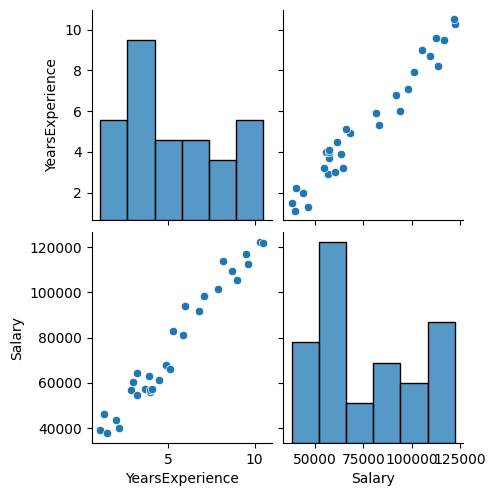

In [175]:
sns.pairplot(df)

### Positive Correlation using Linear Regression

# LINEAR REGRESSION

In [176]:
x = df['YearsExperience']
y = df['Salary']

In [177]:
mean_x = x.mean()
mean_y = y.mean()

In [178]:
mean_x


5.3133333333333335

In [179]:
mean_y

76003.0

In [180]:
x1 = x - mean_x
y1 = y - mean_y


In [181]:
n = len(x)

In [182]:
m = (x1 * y1).sum()/(x1 ** 2).sum()

In [183]:
c = mean_y - (m*mean_x)

In [184]:
Y = c+(m*x)
Y

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
Name: YearsExperience, dtype: float64

In [185]:
Y = round(Y,0)
Y

0      36187.0
1      38077.0
2      39967.0
3      44692.0
4      46582.0
5      53197.0
6      54142.0
7      56032.0
8      56032.0
9      60757.0
10     62647.0
11     63592.0
12     63592.0
13     64537.0
14     68317.0
15     72097.0
16     73987.0
17     75877.0
18     81547.0
19     82492.0
20     90052.0
21     92887.0
22    100447.0
23    103282.0
24    108007.0
25    110842.0
26    115567.0
27    116512.0
28    123127.0
29    125017.0
Name: YearsExperience, dtype: float64

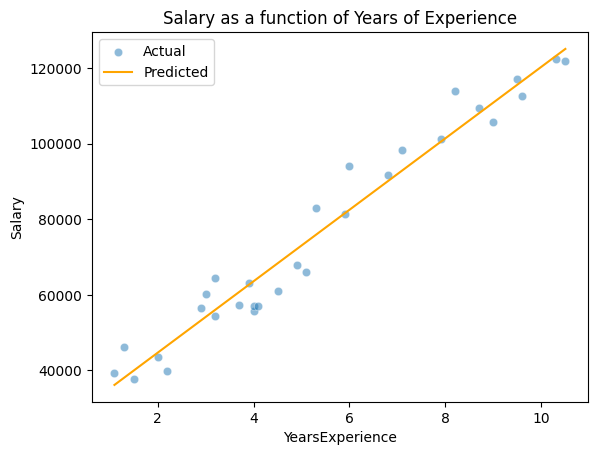

In [186]:
ax = sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
ax.set_title('Salary as a function of Years of Experience')

sns.lineplot(x=x, y=Y, color="orange")
plt.gca().legend(('Actual','Predicted'))

In [187]:
e = y - Y
RSS = (e**2).sum()

In [188]:
R2 = 1 - RSS/((y1)**2).sum()
R2

0.9569566641282954

### ACCURACY = 95%

# USING FUNCTION

# IMPORT MODEL

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [201]:
X = df[['YearsExperience']]

In [202]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [203]:
model = LinearRegression()


In [204]:
model.fit(x_train,y_train)


LinearRegression()

In [210]:
print( "Model Intercept : ", model.intercept_)
print("Model Coefisient : ", model.coef_)

Model Intercept :  25249.540132029535
Model Coefisient :  [9441.46935165]


In [228]:
y_pred = model.predict(x_test)
y_pred


array([ 37523.45028917,  75289.32769576,  73401.03382543, 102669.58881554,
       110222.76429686,  44132.47883532,  89451.53172323, 114943.49897268,
        39411.7441595 ])

In [214]:
mean_absolute_error(y_test,y_pred)

5137.291513414335

In [215]:
mean_absolute_percentage_error(y_test,y_pred)

0.07066663894000527

In [216]:
mean_squared_error(y_test,y_pred)


38750002.34819778

In [237]:
r2 = r2_score(y_test, y_pred)
r2

0.9549419556514891

## THE ACCURACY USING FUNCTION ALSO = 95 %